<a href="https://colab.research.google.com/github/SDS-AAU/dsba-cbs/blob/master/M3/workshop/Autoencoder_SDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder – an exmaple of advanced neural architectures

![alt text](https://curiousily.com/static/1c805181257678f16d092385fe580f09/7bc11/mushroom_encoder.png)

## We'll start with an exmple from the Keras Blog of the most simple autoencoder

In [13]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


In [14]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [15]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [18]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [19]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 1s 4ms/step - loss: 0.2767 - val_loss: 0.1917
Epoch 2/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1721 - val_loss: 0.1536
Epoch 3/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1441 - val_loss: 0.1333
Epoch 4/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1283 - val_loss: 0.1210
Epoch 5/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1183 - val_loss: 0.1129
Epoch 6/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1113 - val_loss: 0.1072
Epoch 7/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1061 - val_loss: 0.1026
Epoch 8/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1024 - val_loss: 0.0995
Epoch 9/15
235/235 [==============================] - 1s 4ms/step - loss: 0.0996 - val_loss: 0.0973
Epoch 10/15
235/235 [==============================] - 1s 4ms/step - loss: 0.0977 - val_loss: 0.0956

In [20]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

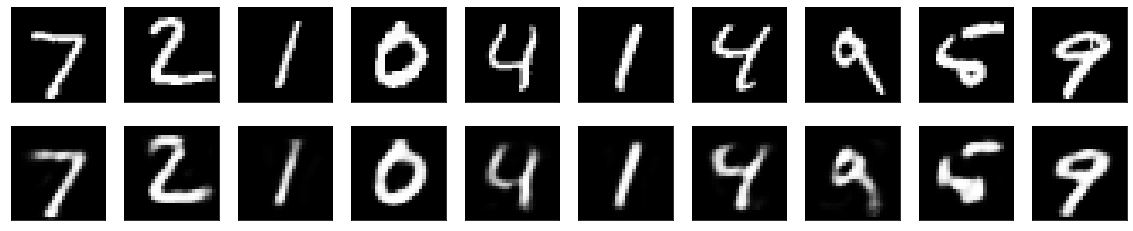

In [21]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Creditcard fraud example

[original article](https://www.datascience.com/blog/fraud-detection-with-tensorflow)

In [22]:
!wget https://github.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/raw/master/data/creditcardfraud.zip

--2020-12-02 15:21:10--  https://github.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/raw/master/data/creditcardfraud.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/master/data/creditcardfraud.zip [following]
--2020-12-02 15:21:10--  https://raw.githubusercontent.com/curiousily/Credit-Card-Fraud-Detection-using-Autoencoders-in-Keras/master/data/creditcardfraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71387154 (68M) [application/zip]
Saving to: ‘creditcardfraud.zip’

creditcardfraud.zip 100%

In [23]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv("creditcard.csv")

In [26]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

In [29]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [30]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
classifier.score(X_test, y_test)

0.9991222218320986

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
np.sum(y_pred)

66

In [34]:
np.sum(y_test)

98

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,y_pred)

array([[56855,     9],
       [   41,    57]])

In [37]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [38]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [39]:

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [40]:
nb_epoch = 5
batch_size = 64

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])



history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test)).history

Epoch 1/5
3554/3554 [==============================] - 15s 4ms/step - loss: 0.8358 - accuracy: 0.5704 - val_loss: 0.8011 - val_accuracy: 0.6272
Epoch 2/5
3554/3554 [==============================] - 14s 4ms/step - loss: 0.7536 - accuracy: 0.6656 - val_loss: 0.7764 - val_accuracy: 0.6810
Epoch 3/5
3554/3554 [==============================] - 15s 4ms/step - loss: 0.7403 - accuracy: 0.6809 - val_loss: 0.7686 - val_accuracy: 0.6774
Epoch 4/5
3554/3554 [==============================] - 15s 4ms/step - loss: 0.7343 - accuracy: 0.6884 - val_loss: 0.7640 - val_accuracy: 0.6938
Epoch 5/5
3554/3554 [==============================] - 15s 4ms/step - loss: 0.7305 - accuracy: 0.6930 - val_loss: 0.7622 - val_accuracy: 0.6918


In [41]:
# We start by making the predictions
predictions = autoencoder.predict(X_test)

In [42]:
# We calculate the two reconstruction errors and make a dataframe with the errors and the class
euclidian = [np.linalg.norm(X_test[i] - predictions[i]) for i in range(len(X_test))]
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

In [43]:
error_df = pd.DataFrame({'mse': mse,
                        'true_class': y_test,
                        'euclidian': euclidian})

In [44]:
# Let's check if the error is different for our top-patents

error_df.groupby(by='true_class').mean()

,mse,euclidian
true_class,,
0,0.709002,3.854597
1,31.289197,23.776064


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: ignored

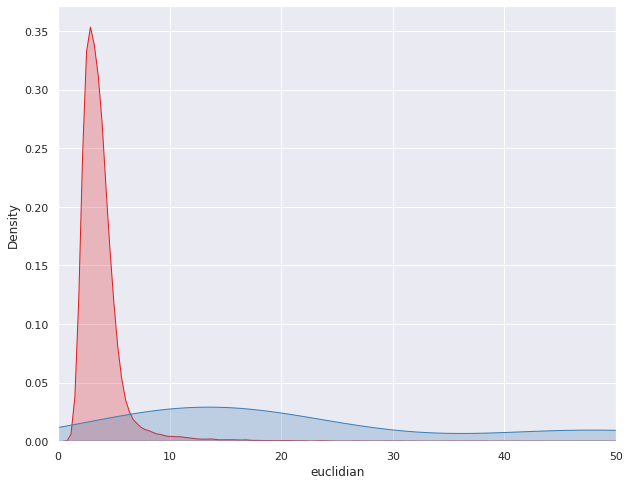

In [45]:
import seaborn as sns; sns.set(color_codes=True); sns.set(style="darkgrid"); sns.set_palette("Set1")

# A bit more fancy

# Set up the figure
f, ax = plt.subplots(figsize=(10, 8))

ax.set(xlim=(0,50))

ax = sns.kdeplot(error_df[error_df['true_class'] == 0]['euclidian'], shade=True, shade_lowest=False, kernel='cos')
ax = sns.kdeplot(error_df[error_df['true_class'] == 1]['euclidian'], shade=True, shade_lowest=False, kernel='cos')
ax.axes.get_legend().texts[0].set_text('normal')
ax.axes.get_legend().texts[1].set_text('fraud')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = [1 if e > 10 else 0 for e in error_df.euclidian]

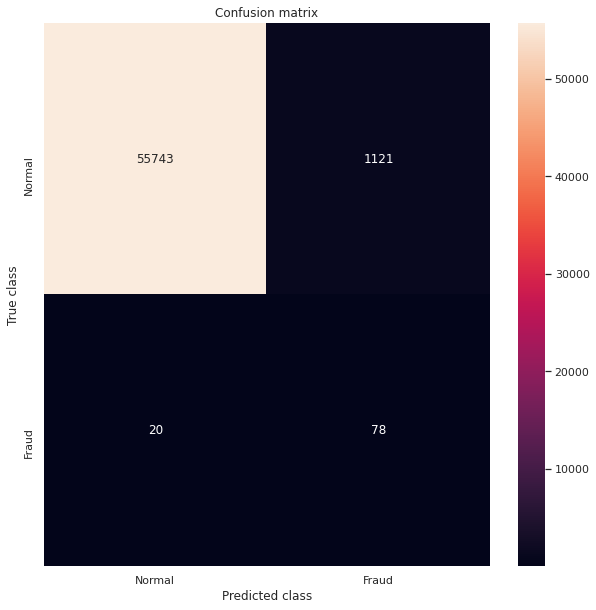

In [ ]:
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

LABELS = ["Normal", "Fraud"]

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.savefig('confusion_autoenc_3.8-12.pdf')
#plt.show()